<a href="https://colab.research.google.com/github/Yamunaprakash/Yamuna_C6877299FC5417783E14EE5E0CA4E418/blob/main/Sustainable_Lifestyle_Rating_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
naveennas_sustainable_lifestyle_rating_dataset_path = kagglehub.dataset_download('naveennas/sustainable-lifestyle-rating-dataset')

print('Data source import complete.')


100%|██████████| 9.62k/9.62k [00:00<00:00, 10.6MB/s]

Extracting files...
Data source import complete.


بسم الله

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/lifestyle_sustainability_data.csv')

In [5]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [6]:
df.tail()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
494,496,38,Rural,Mostly Plant-Based,Often,Walk,Renewable,House,1789,Sometimes,True,4,High,150,2000,Female,Rarely,Recycling,High,4
495,497,25,Urban,Balanced,Sometimes,Public Transit,Non-Renewable,Apartment,987,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,2
496,498,51,Suburban,Mostly Plant-Based,Always,Bike,Mixed,House,1678,Rarely,True,5,High,280,3200,Non-Binary,Sometimes,Recycling,Moderate,5
497,499,32,Rural,Mostly Plant-Based,Rarely,Walk,Mixed,House,1850,Often,False,1,High,397,4076,Female,Rarely,Recycling,Low,5
498,500,55,Suburban,Mostly Animal-Based,Always,Car,Mixed,House,871,Often,False,5,NaN,385,2066,Non-Binary,Often,Recycling,Low,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ParticipantID,499.0,250.024048,144.233925,1.0,125.5,250.0,374.5,500.0
Age,499.0,44.052104,14.904828,18.0,31.0,44.0,58.0,96.0
HomeSize,499.0,1518.046092,672.212235,407.0,951.5,1450.0,1995.0,2997.0
EnvironmentalAwareness,499.0,3.062124,1.342145,1.0,2.0,3.0,4.0,5.0
MonthlyElectricityConsumption,499.0,291.963928,120.482275,55.0,185.0,295.0,400.0,498.0
MonthlyWaterConsumption,499.0,3139.521042,1224.609306,536.0,2000.0,3350.0,4100.0,5250.0
Rating,499.0,3.430862,1.502585,1.0,2.0,4.0,5.0,5.0


<Axes: >

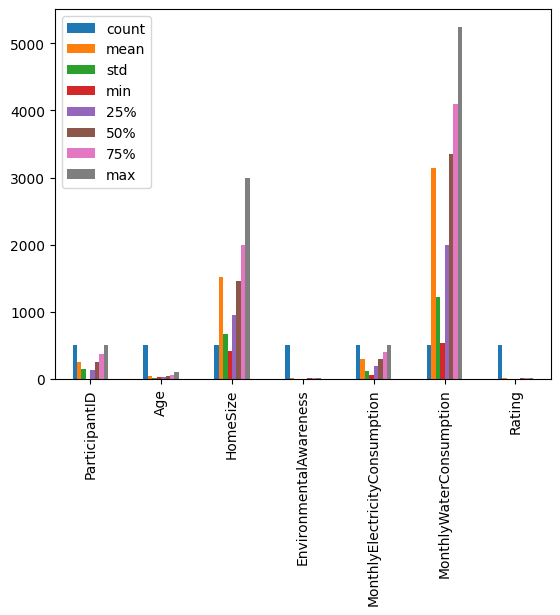

In [9]:
df.describe().T.plot(kind='bar')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

,0
ParticipantID,0
Age,0
Location,0
DietType,0
LocalFoodFrequency,0
TransportationMode,0
EnergySource,0
HomeType,0
HomeSize,0
ClothingFrequency,0


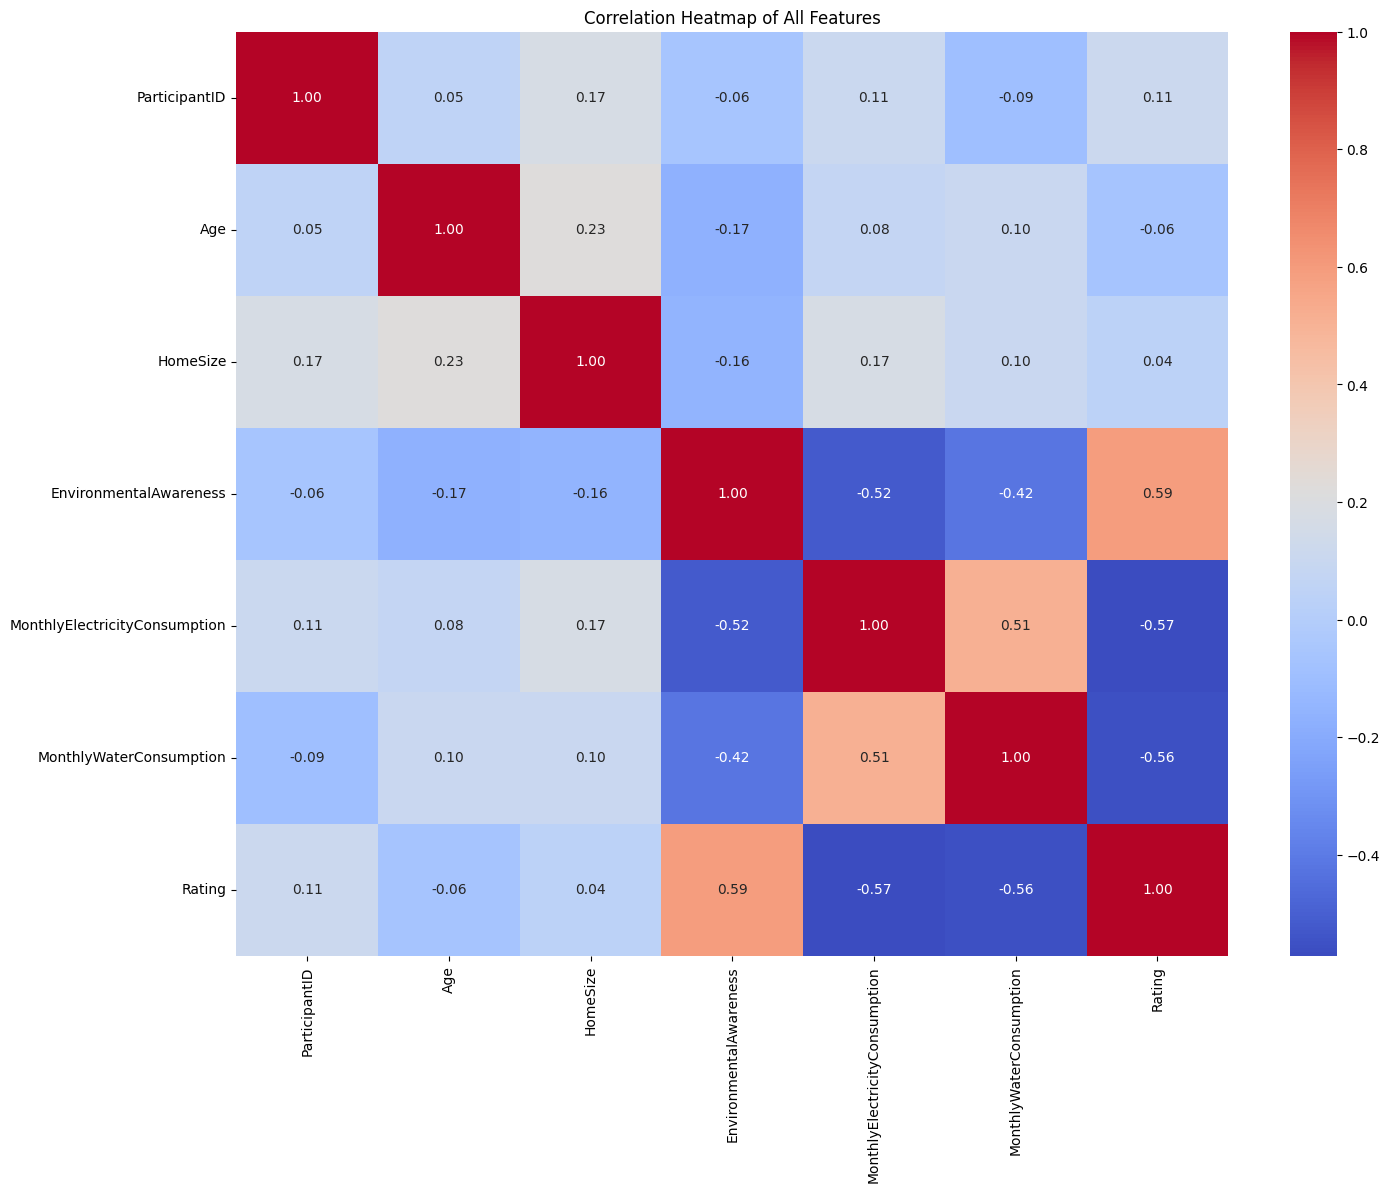

In [12]:
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.show()

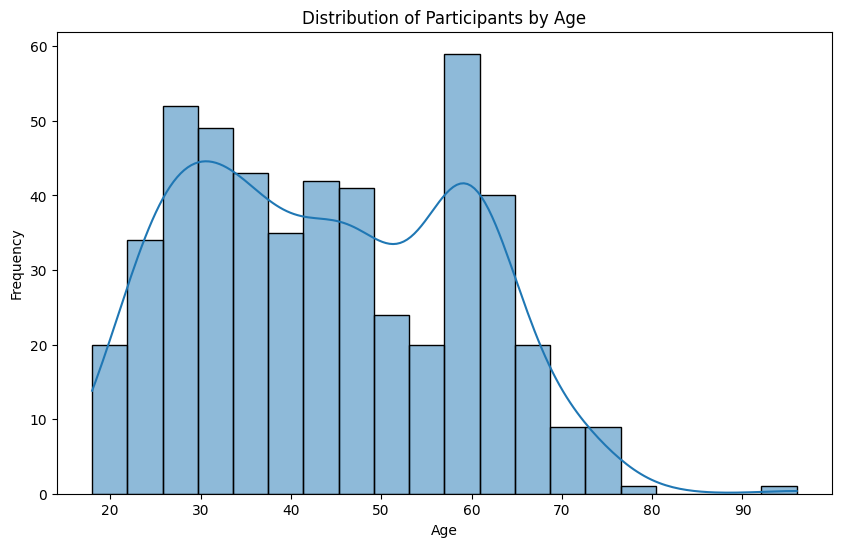

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Participants by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

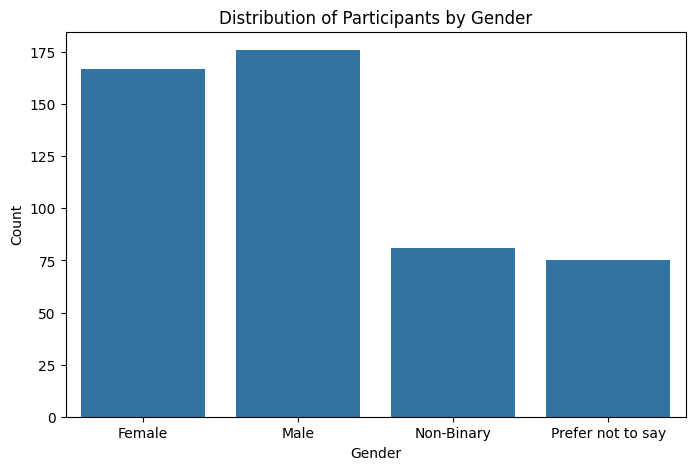

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

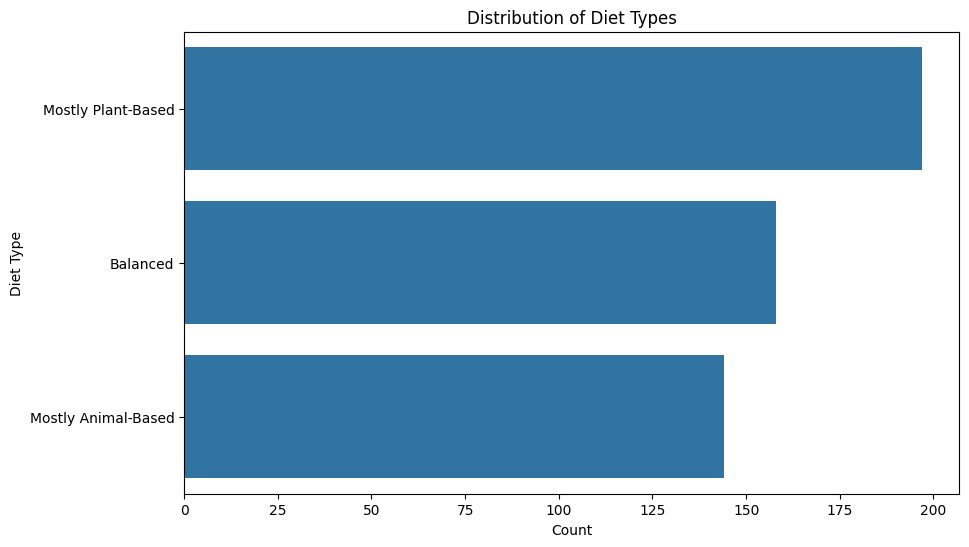

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y='DietType', data=df, order=df['DietType'].value_counts().index)
plt.title('Distribution of Diet Types')
plt.xlabel('Count')
plt.ylabel('Diet Type')
plt.show()

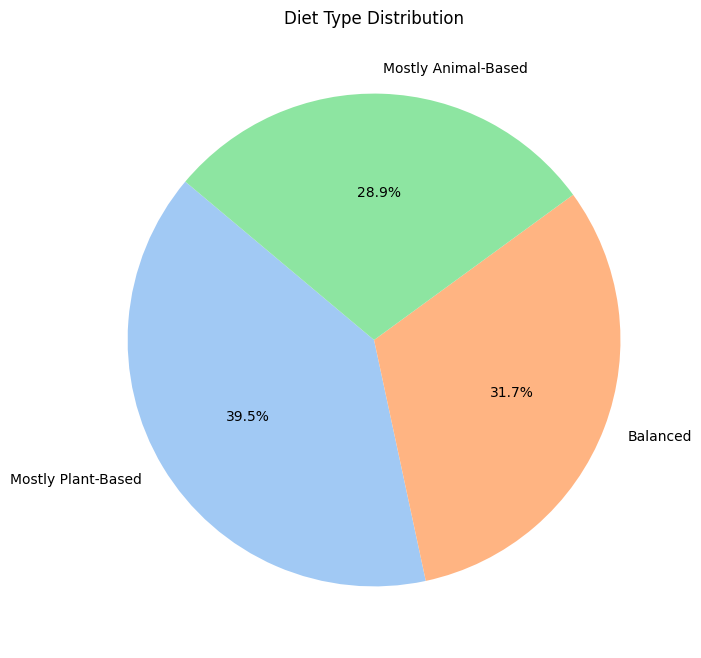

In [16]:
plt.figure(figsize=(8, 8))
diet_type_counts = df['DietType'].value_counts()
plt.pie(diet_type_counts, labels=diet_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Diet Type Distribution')
plt.show()

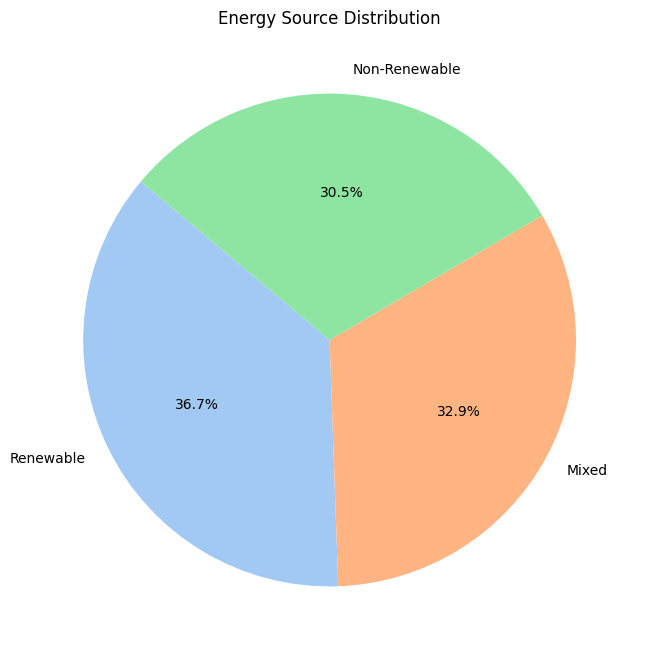

In [17]:
plt.figure(figsize=(8, 8))
energy_source_counts = df['EnergySource'].value_counts()
plt.pie(energy_source_counts, labels=energy_source_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Distribution')
plt.show()

In [18]:
df.columns.to_list()


['ParticipantID',
 'Age',
 'Location',
 'DietType',
 'LocalFoodFrequency',
 'TransportationMode',
 'EnergySource',
 'HomeType',
 'HomeSize',
 'ClothingFrequency',
 'SustainableBrands',
 'EnvironmentalAwareness',
 'CommunityInvolvement',
 'MonthlyElectricityConsumption',
 'MonthlyWaterConsumption',
 'Gender',
 'UsingPlasticProducts',
 'DisposalMethods',
 'PhysicalActivities',
 'Rating']

In [19]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['ParticipantID',
 'Age',
 'Location',
 'DietType',
 'LocalFoodFrequency',
 'TransportationMode',
 'EnergySource',
 'HomeType',
 'HomeSize',
 'ClothingFrequency',
 'SustainableBrands',
 'EnvironmentalAwareness',
 'CommunityInvolvement',
 'MonthlyElectricityConsumption',
 'MonthlyWaterConsumption',
 'Gender',
 'UsingPlasticProducts',
 'DisposalMethods',
 'PhysicalActivities',
 'Rating']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        # Check if the column is suitable for a bar chart
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )

            # Show the figure
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )

            # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [20]:
df

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,496,38,Rural,Mostly Plant-Based,Often,Walk,Renewable,House,1789,Sometimes,True,4,High,150,2000,Female,Rarely,Recycling,High,4
495,497,25,Urban,Balanced,Sometimes,Public Transit,Non-Renewable,Apartment,987,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,2
496,498,51,Suburban,Mostly Plant-Based,Always,Bike,Mixed,House,1678,Rarely,True,5,High,280,3200,Non-Binary,Sometimes,Recycling,Moderate,5
497,499,32,Rural,Mostly Plant-Based,Rarely,Walk,Mixed,House,1850,Often,False,1,High,397,4076,Female,Rarely,Recycling,Low,5


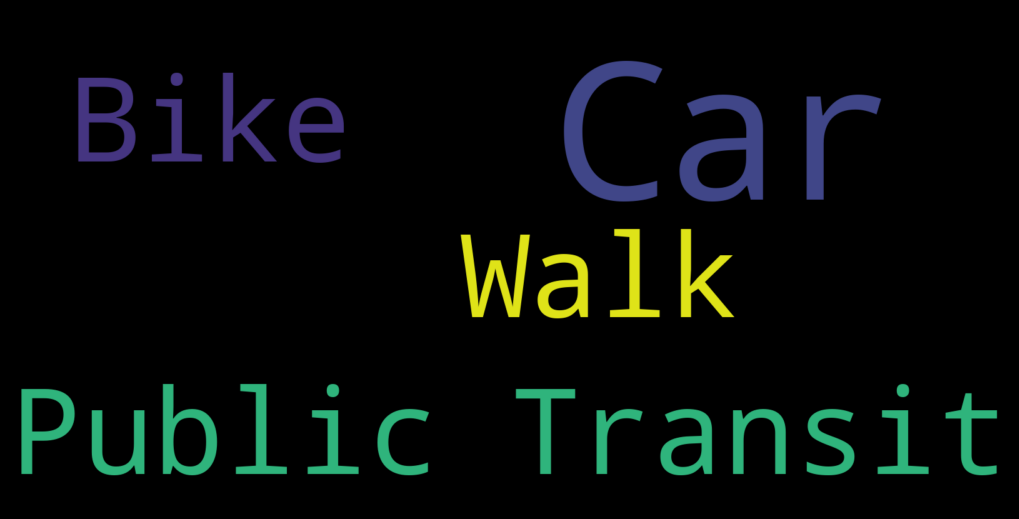

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["TransportationMode"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()